# Trabalho Prático 3 de PDI
Guilherme Dallmann Lima

Thalía Djune Costa Longaray

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
import scipy.signal as signal
from skimage.filters import butterworth, gaussian, sobel, unsharp_mask, laplace
from skimage import util, img_as_ubyte, draw, transform
from skimage.color import rgb2gray

#Máscaras

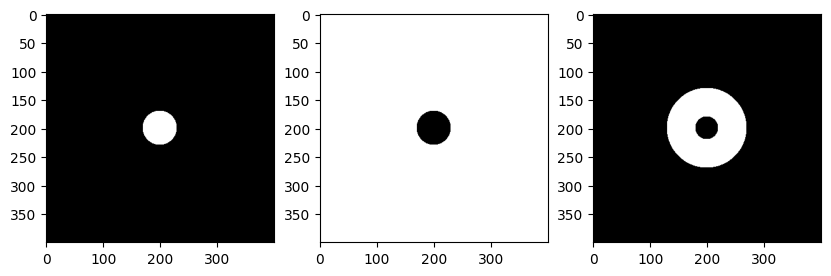

In [16]:
mask_lowpass = np.zeros((400, 400, 3), dtype = np.double)
rr, cc = draw.disk((199, 199), 30, shape = mask_lowpass.shape)
mask_lowpass[rr, cc, :] = (1, 1, 1)
mask_lowpass = rgb2gray(mask_lowpass) + 0.000001                                #soma p evitar div por 0

mask_highpass = 1 - mask_lowpass

mask_bandpass = np.zeros((400, 400, 3), dtype = np.double)
rr, cc = draw.disk((199, 199), 70, shape = mask_bandpass.shape)
mask_bandpass[rr, cc, :] = (1, 1, 1)
rr, cc = draw.disk((199, 199), 20, shape = mask_bandpass.shape)
mask_bandpass[rr, cc, :] = (0, 0, 0)
mask_bandpass = rgb2gray(mask_bandpass) + 0.000001                              #soma p evitar div por 0

fig, axes = plt.subplots(1, 3, figsize=(10,6))
axes[0].imshow(mask_lowpass, cmap = 'gray')
axes[1].imshow(mask_highpass, cmap = 'gray')
axes[2].imshow(mask_bandpass, cmap = 'gray')

#1)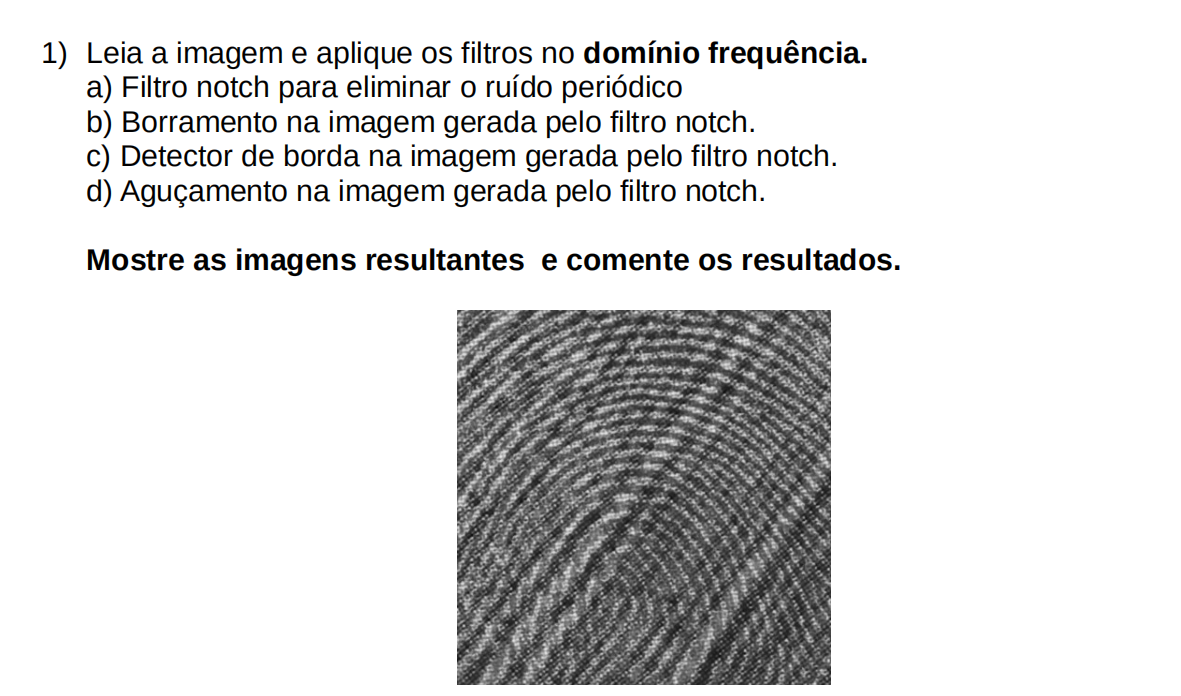

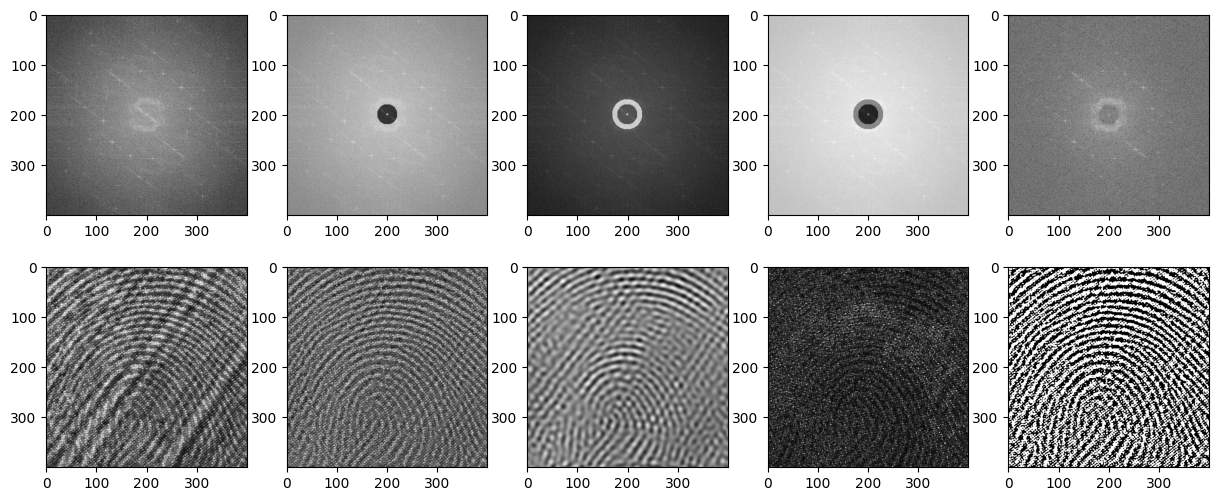

In [17]:
i1 = io.imread("originalprint.png")
i1fft = np.fft.fftshift(np.fft.fft2(i1))

mask_lowpass = transform.resize(mask_lowpass, i1.shape)
mask_highpass = transform.resize(mask_highpass, i1.shape)
mask_bandpass = transform.resize(mask_bandpass, i1.shape)

#A)
#notch p remoção do ruído periódico
notch = np.ones((400, 400, 3), dtype = np.double)
rr, cc = draw.disk((199, 199), 20, shape = notch.shape)
notch[rr, cc, :] = (0, 0, 0)
rr, cc = draw.disk((199, 199), 2, shape = notch.shape)
notch[rr, cc, :] = (1, 1, 1)
notch = rgb2gray(notch) + 0.000001                                              #soma p evitar div por 0

i1notchfft = i1fft * notch
i1notch = abs(np.fft.ifft2(i1notchfft))

#B)
i1bfft = i1notchfft * mask_lowpass
i1b = abs(np.fft.ifft2(i1bfft))

#C)
i1cfft = i1notchfft * mask_highpass
i1c = abs(np.fft.ifft2(i1cfft))

#D)
i1d = unsharp_mask(i1notch, radius = 15, amount = 15)
i1dfft = np.fft.fftshift(np.fft.fft2(i1d))

fig, axes = plt.subplots(2, 5, figsize=(15,6))
axes[0][0].imshow(np.log(abs(i1fft)), cmap = 'gray')
axes[0][1].imshow(np.log(abs(i1notchfft)), cmap = 'gray')
axes[0][2].imshow(np.log(abs(i1bfft)), cmap = 'gray')
axes[0][3].imshow(np.log(abs(i1cfft)), cmap = 'gray')
axes[0][4].imshow(np.log(abs(i1dfft)), cmap = 'gray')
axes[1][0].imshow(i1, cmap = 'gray')
axes[1][1].imshow(i1notch, cmap = 'gray')
axes[1][2].imshow(i1b, cmap = 'gray')
axes[1][3].imshow(i1c, cmap = 'gray')
axes[1][4].imshow(i1d, cmap = 'gray')

##R:
###A 1ª imagem trata-se da imagem original e o espectro acima dela foi gerado a partir da Transformada de Fourier.

###Na 2ª imagem, é possível identificar que o filtro notch aplicado ao espectro atenuou as frequências fora da faixa de corte, resultando em uma transição suave e gradual da imagem.

###Na 3ª imagem, utilizou-se um filtro passa-baixa, que reduziu o ruído e os detalhes finos, tornando a imagem mais suave com transições graduais entre as intensidades dos pixels.

###Na 4ª imagem, empregou-se um filtro passa-alta, cujo propósito é encontrar as bordas ou transições abruptas de intensidade em uma imagem. Como resultado, a imagem ficou mais escura devido à perda de informações na parte interna.

###Na 5ª imagem, aplicou-se o filtro Unsharp Mask, um filtro de aguçamento usado para realçar detalhes e bordas em uma imagem. Foram ajustados os parâmetros de raio e controle da intensidade da imagem.

###É possível estabelecer uma comparação entre as imagens 2 e 3, bem como entre as imagens 4 e 5, devido aos objetivos semelhantes que compartilham.

###A diferença fundamental entre passa-baixa e o Unsharp Mask reside em suas aplicações. Enquanto um filtro passa-baixa é empregado na detecção de bordas, destacando transições de intensidade na imagem, o Unsharp Mask é utilizado para aprimorar a nitidez e realçar detalhes sutis na imagem.

#2) 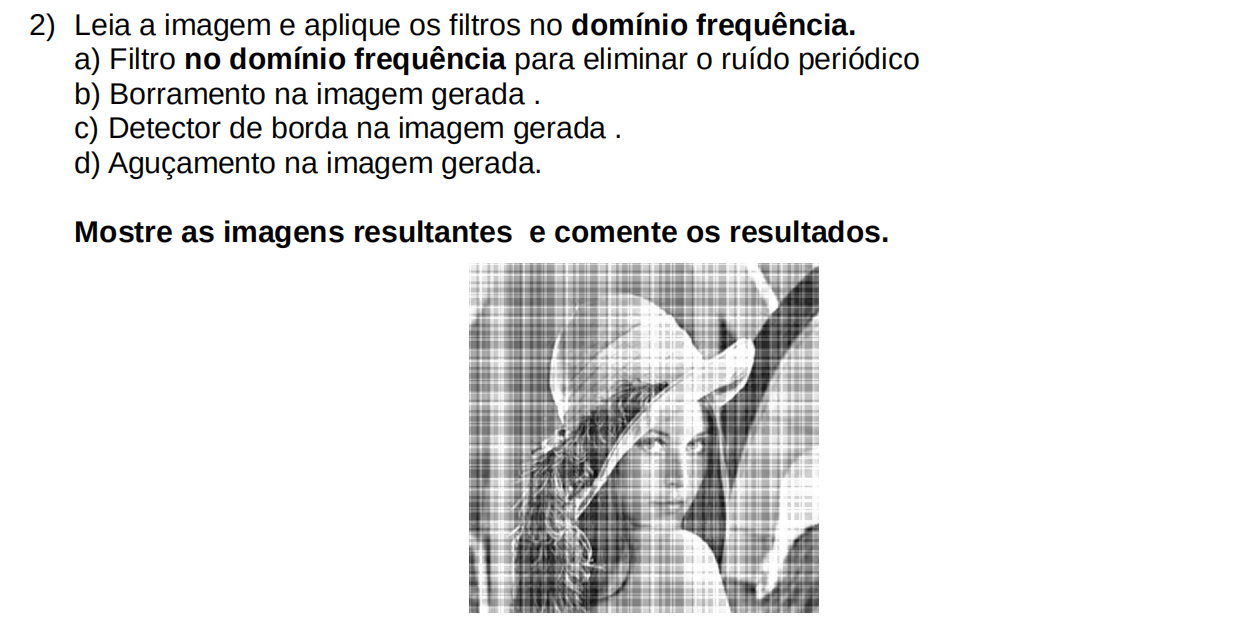

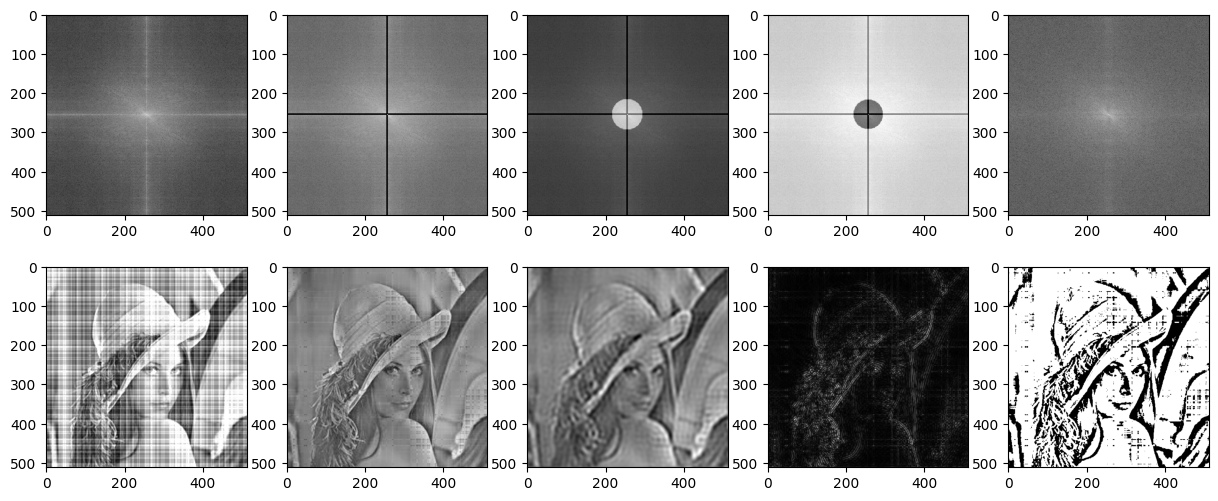

In [18]:
i2 = io.imread("lena.png")
i2fft = np.fft.fftshift(np.fft.fft2(i2))

mask_lowpass = transform.resize(mask_lowpass, i2.shape)
mask_highpass = transform.resize(mask_highpass, i2.shape)
mask_bandpass = transform.resize(mask_bandpass, i2.shape)

#A)
i2notchfft = i2fft.copy()
i2notchfft[:255, 253:257] = 0.1
i2notchfft[-255:, 253:257] = 0.1
i2notchfft[253:257, :255] = 0.1
i2notchfft[253:257, -255:] = 0.1
i2notch = abs(np.fft.ifft2(i2notchfft))

#B)
i2bfft = i2notchfft * mask_lowpass
i2b = abs(np.fft.ifft2(i2bfft))

#C)
i2cfft = i2notchfft * mask_highpass
i2c = abs(np.fft.ifft2(i2cfft))

#D)
i2d = unsharp_mask(i2notch, radius = 15, amount = 15)
i2dfft = np.fft.fftshift(np.fft.fft2(i2d))

fig, axes = plt.subplots(2, 5, figsize=(15,6))
axes[0][0].imshow(np.log(abs(i2fft)), cmap = 'gray')
axes[0][1].imshow(np.log(abs(i2notchfft)), cmap = 'gray')
axes[0][2].imshow(np.log(abs(i2bfft)), cmap = 'gray')
axes[0][3].imshow(np.log(abs(i2cfft)), cmap = 'gray')
axes[0][4].imshow(np.log(abs(i2dfft)), cmap = 'gray')
axes[1][0].imshow(i2, cmap = 'gray')
axes[1][1].imshow(i2notch, cmap = 'gray')
axes[1][2].imshow(i2b, cmap = 'gray')
axes[1][3].imshow(i2c, cmap = 'gray')
axes[1][4].imshow(i2d, cmap = 'gray')

###A 1ª imagem trata-se da imagem original e seu espectro, localizado acima dela, foi obtido através da Transformada de Fourier.

###A 2ª imagem corresponde ao espectro modificado para neutralizar as linhas horizontais e verticais observadas na imagem original.

###É possível estabelecer uma comparação entre as imagens 2 e 3 devido aos objetivos semelhantes que compartilham, conforme indicado na questão anterior.

###As imagens 4 e 5 divergem da comparação realizada na questão anterior devido à diferença de ruído entre as imagens. Foram ajustados os parâmetros de raio e controle da intensidade da imagem. O raio indica o número de pixels ao redor de cada pixel que contribuirá para o cálculo do realce, e o valor que controla a intensidade do realce, ambos ajustados para o valor de 15. O valor escolhido se deve a diversas comparações com outros valores, sendo o único que obteve um resultado aceitável em nossas análises.







#3)
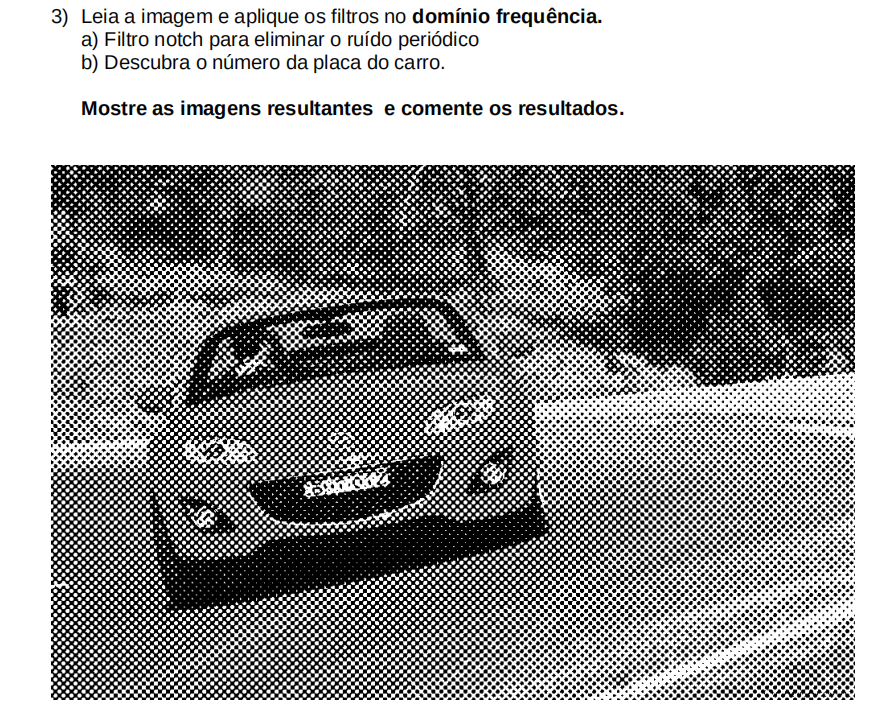

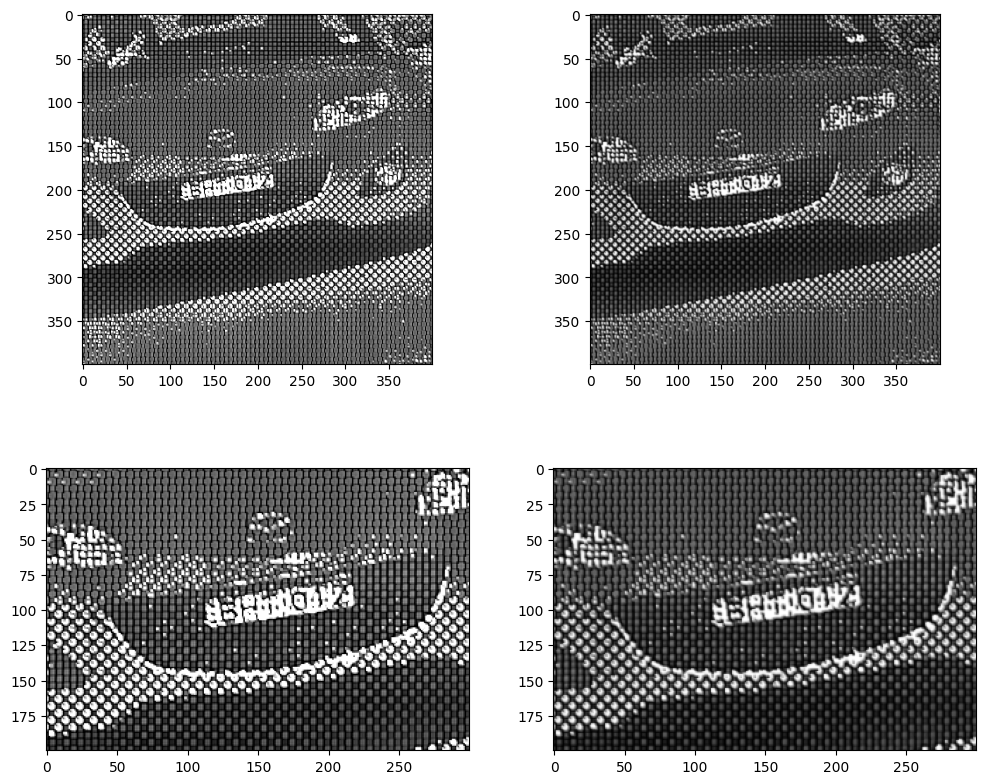

In [19]:
i3 = io.imread("I2Cvt.png")
#A)
i3fft = np.fft.fftshift(np.fft.fft2(i3))
#B)
i3fft_modif = i3fft.copy()
i3fft_modif[:332, 399:401] = 10
i3fft_modif[-332:, 399:401] = 10
i3fft_modif[:332, 599:601] = 10
i3fft_modif[-332:, 599:601] = 10
i3fft_modif[331:333, 499:501] = 10
i3fft_modif[-331:333, 499:501] = 10
i3fft_modif[331:333, :499] = 0.1
i3fft_modif[331:333, -499:] = 0.1
i3notch = abs(np.fft.ifft2(i3fft_modif))
i3ag = unsharp_mask(i3notch, radius = 15, amount = 15)

from skimage.morphology import erosion, dilation
# i3ag = (dilation(erosion(i3notch, np.ones((2, 2))), np.ones((2, 2))))
# i3notch = erosion(dilation(unsharp_mask(i3ag) > 0.7, np.ones((2, 2))), np.ones((2, 2)))
# newimage = i3notch + i3ag

i3ag = erosion(i3notch, np.ones((2, 2)))
i3notch = erosion(dilation(unsharp_mask(i3ag) > 0.7, np.ones((2, 2))), np.ones((2, 2)))
newimage = unsharp_mask(unsharp_mask(dilation(gaussian(i3notch + i3ag, sigma = 0.7), np.ones((2, 2)))))
newim = (erosion(newimage, np.ones((2, 2))))

newim = gaussian(newim + newimage, sigma = 0.5)

fig, axes = plt.subplots(2, 2, figsize=(12,10))
# axes[0][0].imshow(np.log(abs(i3fft)), cmap = 'gray')
# axes[0][1].imshow(np.log(abs(i3fft_modif)), cmap = 'gray')
# axes[1][0].imshow(i3notch, cmap = 'gray')
# axes[1][1].imshow(i3ag, cmap = 'gray')
# axes[2][0].imshow((i3notch + i3ag)[300:500, 200:500], cmap = 'gray')
# axes[2][1].imshow(newimage[300:500, 200:500], cmap = 'gray')

axes[0][0].imshow(newimage[200:600, 200:600], cmap = 'gray')
axes[0][1].imshow(newim[200:600, 200:600], cmap = 'gray')
axes[1][0].imshow(newimage[300:500, 200:500], cmap = 'gray')
axes[1][1].imshow(newim[300:500, 200:500], cmap = 'gray')

### A 1ª imagem da 1ª linha corresponde ao espectro da imagem original. A partir dela, é possível observar diversas regiões mais claras, das quais destacam-se duas linhas verticais e um ponto central.

### A 2ª imagem da 1ª linha é, portanto, a modificação da 1ª, de modo a neutralizar as regiões mais claras destacadas, permitindo melhor visualização dos detalhes da imagem através da redução do ruído periódico.

### A 1ª imagem da 2ª linha refere-se à imagem obtida a partir da modificação apontada no parágrafo anterior. Nela, a placa do automóvel se torna mais legível.

### A 2ª imagem da 2ª linha trata-se de um aguçamento da 1ª, auxiliando na visualização do conteúdo da placa.

### As imagens da 3ª linha são cortes das superiores.

###R: Placa BHT-01Z